In [1]:
import insightface
insightface.__path__

['/home/woreom/anaconda3/envs/deephide/lib/python3.10/site-packages/insightface']

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from insightface.app import FaceAnalysis

In [2]:
app = FaceAnalysis(name='buffalo_sc', root='./', providers=['CUDAExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
img = cv2.imread('img.jpg')
faces = app.get(img)

In [4]:
bboxes = [face['bbox'] for face in faces]
for e in bboxes:
    img[int(e[1]):int(e[3]), int(e[0]):int(e[2])] = cv2.blur(img[int(e[1]):int(e[3]), int(e[0]):int(e[2])], (50,50))

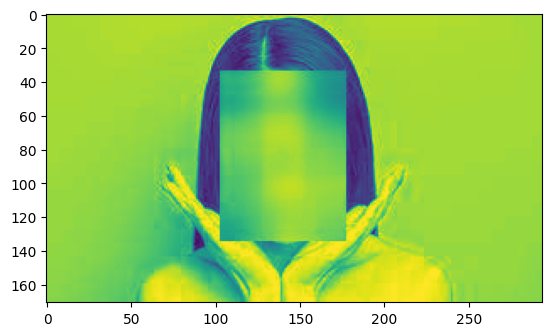

In [5]:
plt.imshow(img[:,:,-1])

In [6]:
cap = cv2.VideoCapture("./vid.mp4")

if (cap.isOpened() == False): 
    print("Error reading video file")

# We need to set resolutions.
# so, convert them from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)
# print(fps)
size = (frame_width, frame_height)

result = cv2.VideoWriter('./out.avi', 
                     cv2.VideoWriter_fourcc('H','2','6','4'),
                     fps, size)

while True:
    try:
        flag, img = cap.read()
        if flag == True:

            # img = cv2.imread("img.jpg")
            # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            faces = app.get(img)
            bboxes = [face['bbox'] for face in faces]
            # print(len(bboxes), end=", ")
            for e in bboxes:
                img[int(e[1]):int(e[3]), int(e[0]):int(e[2])] = cv2.blur(img[int(e[1]):int(e[3]), int(e[0]):int(e[2])], (50,50),)

            result.write(img)

          # Break the loop
        else:
            break
    except:
        pass

cap.release()
result.release()
videoclip = mp.VideoFileClip("out.avi")
audioclip = mp.VideoFileClip("vid.mp4").audio
videoclip = videoclip.set_audio(audioclip)

40.82585278276481


Moviepy - Building video out.mp4.
MoviePy - Writing audio in outTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video out.mp4



Moviepy - Done !
Moviepy - video ready out.mp4
